# Культурист-датасаентист. Стратегия взаимодействия с клиентами

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

## Описание данных

**/datasets/gym_churn.csv** — данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля: 
- `Churn` — факт оттока в текущем месяце;
- Текущие поля в датасете:
    - Данные клиента за предыдущий до проверки факта оттока месяц:
       - `gender` — пол;
       - `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
       - `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
       - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
       - `Phone` — наличие контактного телефона;
       - `Age` — возраст;
       - `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).  
        
        
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    - `Group_visits` — факт посещения групповых занятий;
    - `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    - `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Оглавление
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)  
    1.1 [Вывод к Шагу 1](#step1.1)
    
        
2. [Шаг 2. Предобработка данных](#step2)  
    2.1  [Вывод к Шагу 2](#step2.1)     
  
    
3. [Шаг 3. Исследовательский анализ данных (EDA)](#step3)   
    3.1   [Средние значения признаков](#step3.1)  
    3.2   [Столбчатые гистограммы и распределение признаков](#step3.2)    
    3.3   [Матрица корреляции](#step3.3)  
  
    
    
4. [Шаг 4. Модель прогнозирования оттока клиентов](#step4)   
    4.1   [Обучение модели способом логистической регрессии](#step4.1)  
    4.2   [Обучение модели способом случайного леса](#step4.2)  
  
  
  
5. [Шаг 5. Кластеризация клиентов](#step5)   
    5.1   [Матрица расстояний и дендрограмма](#step5.1)  
    5.2   [Алгоритм K-Means](#step5.2)  
    5.3   [Средние значения признаков для кластеров](#step5.3)    
    5.4   [Графики распределения признаков для кластеров](#step5.4)      
    
 
6. [Шаг 6. Общий вывод.](#step6)  

### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>   
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
import math
import numpy as np
from functools import reduce
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/gym_churn.csv')

display(data.head(10))
data.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


### Вывод<a id="step1.1"></a>   
</div>  

Мы получили полноценный датасет на 4000 записей. На первый взгляд пропущенных значений не наблюдается. Даже к форматам сложно придраться. Обязательно проверим дубликаты, но с таким датасетом должно быть не сложно работать.

Самой большой проблемой на данном этапе кажется название столбцов, с этого и начнём на следующем этапе. 

### Шаг 2. Предобработка данных <a id="step2"></a>   
</div>  

Для начала разберемся с названием столбцов. Приведём все названия к нижнему регистру.

In [2]:
data.columns = data.columns.str.lower()
display(data.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

К самой связи между названиями и содержанием в столбцах претензий нет, поэтому `rename()` использовать не будем.

Посмотрим лучше на наличие дубликатов

In [3]:
data.duplicated().sum()

0

И здёсь всё в порядке. Теперь посмотрим не попал ли кто лишний в `churn`, `gender` и ряд схожих по значениям столбцов

In [4]:
display(data[['churn','gender','near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'lifetime']].apply(lambda x: x.value_counts()).T.stack())

churn            0     2939.0
                 1     1061.0
gender           0     1959.0
                 1     2041.0
near_location    0      619.0
                 1     3381.0
partner          0     2053.0
                 1     1947.0
promo_friends    0     2766.0
                 1     1234.0
phone            0      386.0
                 1     3614.0
contract_period  1     2207.0
                 6      833.0
                 12     960.0
group_visits     0     2351.0
                 1     1649.0
lifetime         0      487.0
                 1      843.0
                 2      610.0
                 3      490.0
                 4      383.0
                 5      273.0
                 6      220.0
                 7      167.0
                 8      111.0
                 9      100.0
                 10      76.0
                 11      48.0
                 12      53.0
                 13      28.0
                 14      24.0
                 15      24.0
          

И здесь особых вопросов нет. Построим гистограмму для `age`, проверим нет ли ничего подозрительного. Дополним проверку методом `describe()`

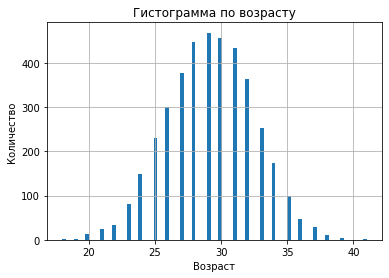

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

In [5]:
data['age'].hist(bins = 80)
plt.title('Гистограмма по возрасту')
plt.xlabel("Возраст")
plt.ylabel("Количество")

plt.show()

display(data['age'].describe())

Почти идеальная гистограмма и ничего странного в описании значений

### Вывод<a id="step2.1"></a>   
</div>  

Как и показалось на первом этапе, датасет оставляет о себе приятное впечатление, всё выглядит очень хорошо. Самой существенной из исправленных проблем оказался верхний регистр в названиях столбцов. Можем переходить к более серьёзному исследовательскому анализу данных (EDA)

### Шаг 3. Исследовательский анализ данных (EDA) <a id="step3"></a>   
</div>  

### Средние значения признаков <a id="step3.1"></a>   
</div> 

Начнём с банального `describe()` для всей таблицы

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


У большинства клиентов есть рядом с домом фитнес-центр. Больше половины клиентов пришли сами, без промо от друзей. Средний возраст около **29 лет**. 

Сгруппируем данные по оттоку и посмотрим есть ли здесь что-то интересное

In [7]:
data.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Те клиенты, которые пришли по промо друзей, с меньшей вероятностью перестанут ходить;
- Чем больше контракт, тем меньше вероятность оттока (логично);
- Пол на отток не влияет;
- Если человек ходит на групповые занятия, то для нас это положительный момент. Больше вероятность, что он останется. 

### Столбчатые гистограммы и распределение признаков <a id="step3.2"></a>   
</div> 

С помощью `distplot` построим одновременно гистограмму и график плотности для всех колонок, сгрупированных по `churn`

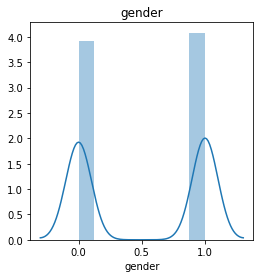

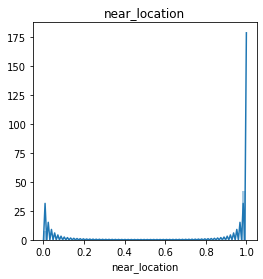

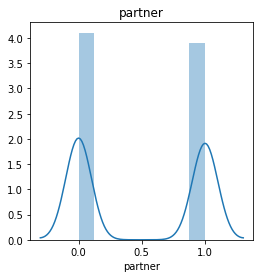

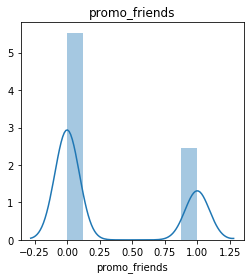

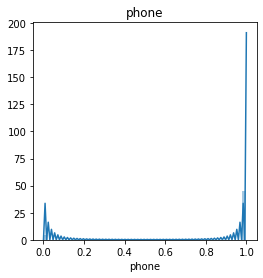

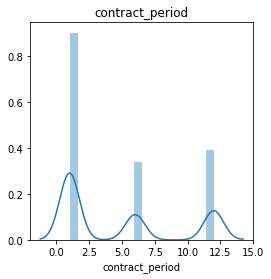

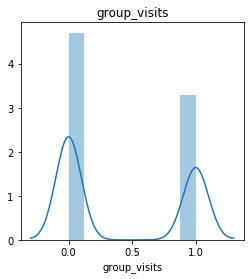

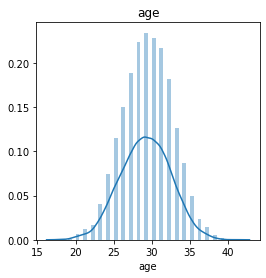

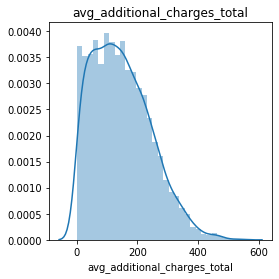

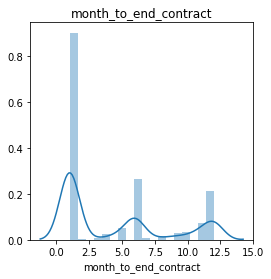

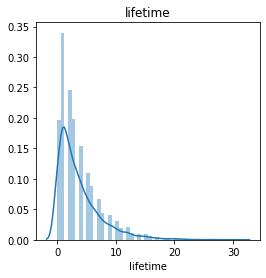

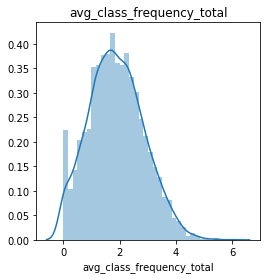

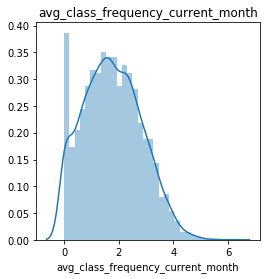

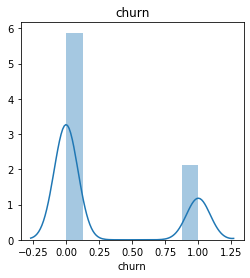

In [8]:
for column in data.columns:
    plt.figure(figsize=(4, 4))
    data.groupby('churn')[column]
    sns.distplot(data[column])
    plt.title(column)
    plt.show()

Визуализируем количество каждого варианта для бинарных столбцов и `contract_period`

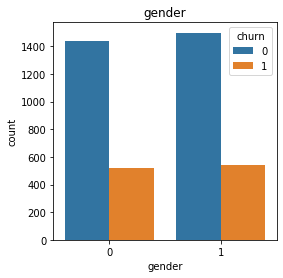

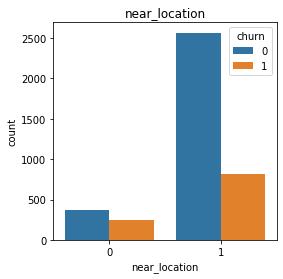

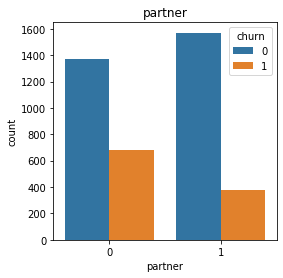

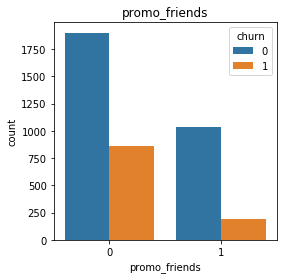

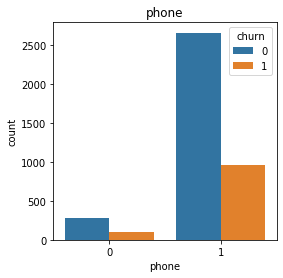

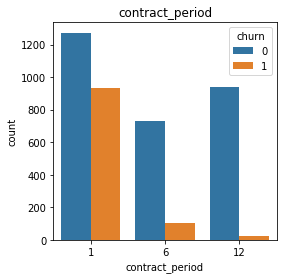

In [9]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone',  'contract_period']:
    plt.figure(figsize=(4, 4))
    sns.countplot(x = data[column], hue='churn', data=data)
    plt.title(column)
    plt.show()

Для остальных же столбцов построим классический "ящик с усами"

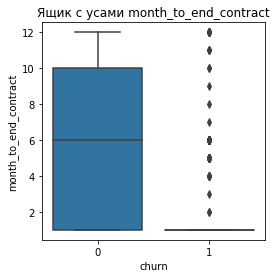

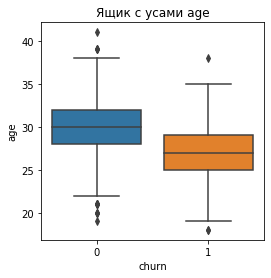

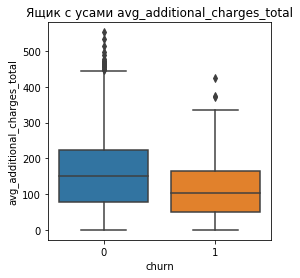

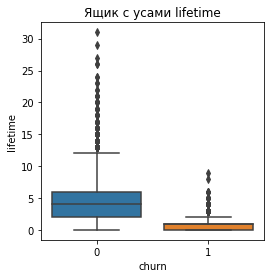

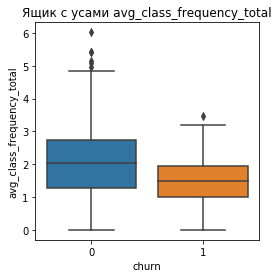

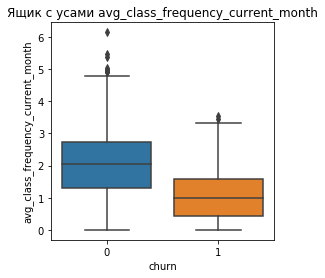

In [10]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x = 'churn', y = data[column], data = data)
    plt.title('Ящик с усами' + ' ' + column)
    plt.show()

В целом, все визуализации подтверждают наши ожидания

- Промо от друзей - надёжный вариант для нас;
- Не оставил телефон - дело плохо; 
- Есть другие фитнесы рядом - тоже сомнительная история;
- Чем больше суммарная выручка и частота посещений, тем маловероятнее отток такого клиента;
- Клиенты 30+ ответственнее подходят к выбору, а значит реже "пропадают;
- Чем долгосрочнее контракт, тем маловероятнее отток;

Иными словами, *ничего контринтуитивного, всё логично*


### Матрица корреляции <a id="step3.3"></a>   
</div> 

Теперь построим матрицу корреляции

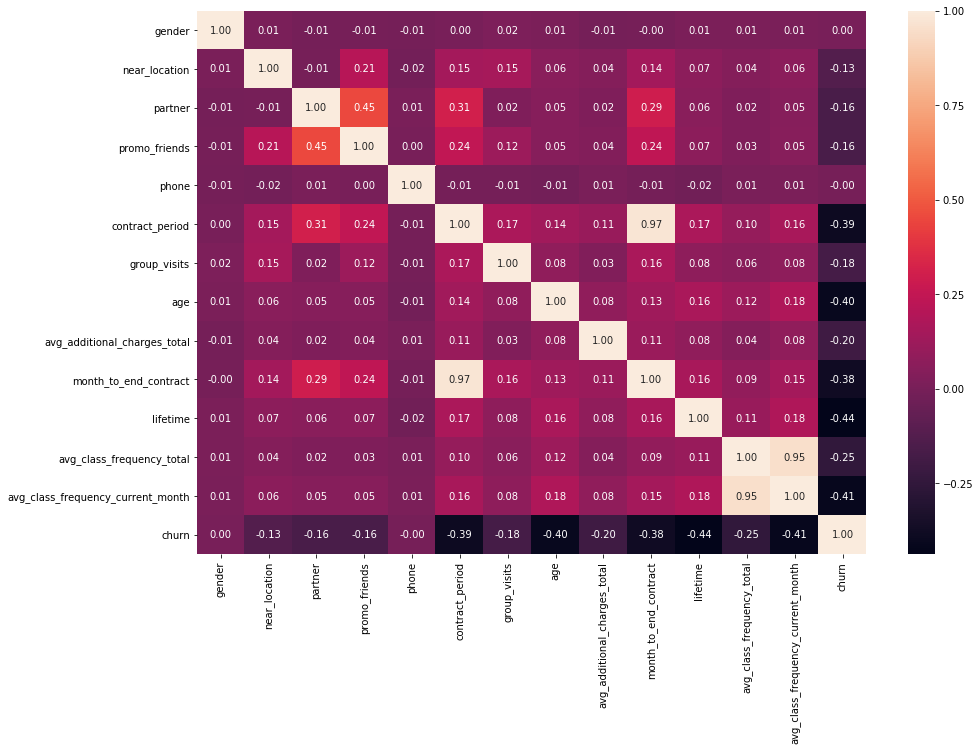

In [11]:
cm = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f')
plt.show()

У нас есть по сути дублирующие столбцы `contract_period` и `month_to_end_contract`. Аналогично выручка напрямую зависит от количества визитов. То есть эти признакми мультиколлинеарные.    

При этом с `churn` наблюдается нулевая корреляция у `phone` и `gender`. 

Отдельный момент: корреляция между клиентами пришедшими по промо и компании-партнёра. Вместе на работу - вместе на тренировку. 

### Шаг 4. Модель прогнозирования оттока клиентов <a id="step4"></a>   
</div>  

`Churn` - наша целевая переменная, поэтому:


In [12]:
X = data.drop('churn', axis = 1)
y = data['churn']

Разделим модель на обучающую и валидационную в соотношении 80/20

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Обучение модели способом логистической регрессии  <a id="step4.1"></a>   
</div>  

Для начала попробуем **логистическую регрессию**

Зададим алгоритм для модели

In [14]:
model = LogisticRegression()

Обучим модель

In [15]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Воспользуемся уже обученной моделью, чтобы сделать прогнозы

In [16]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

Выведем все изученные метрики

In [17]:
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Метрики для логистической регрессии
Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


### Обучение модели способом случайного леса  <a id="step4.2"></a>   
</div>  

Аналогично зададим алгоритм для новой модели на основе алгоритма **случайного леса**

Обучим *StandartScaler* на обучающей выборке

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Преобразуем обучающие и валидационные наборы данных

In [19]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Зададим алгоритм для новой модели на основе алгоритма случайного леса

In [20]:
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 0) 
rf_model.fit(X_train_st, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Сделаем прогнозы

In [21]:
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [22]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84


Таким образом **логистическая регрессия** показала себя лучше, чем **случайный лес**. Даже если менять значение `n_estimators` в модели случайного леса. 

### Шаг 5. Кластеризация клиентов <a id="step5"></a>   
</div>  

Для того, чтобы кластеризировать клиентов, данные нужно стандартизировать

In [23]:
sc = StandardScaler()
x_sc = sc.fit_transform(data)

### Матрица расстояний и дендрограмма <a id="step5.1"></a>   
</div>  

Применим функцию `linkage()` c параметром method = `ward`. 

In [24]:
linked = linkage(x_sc, method = 'ward') 

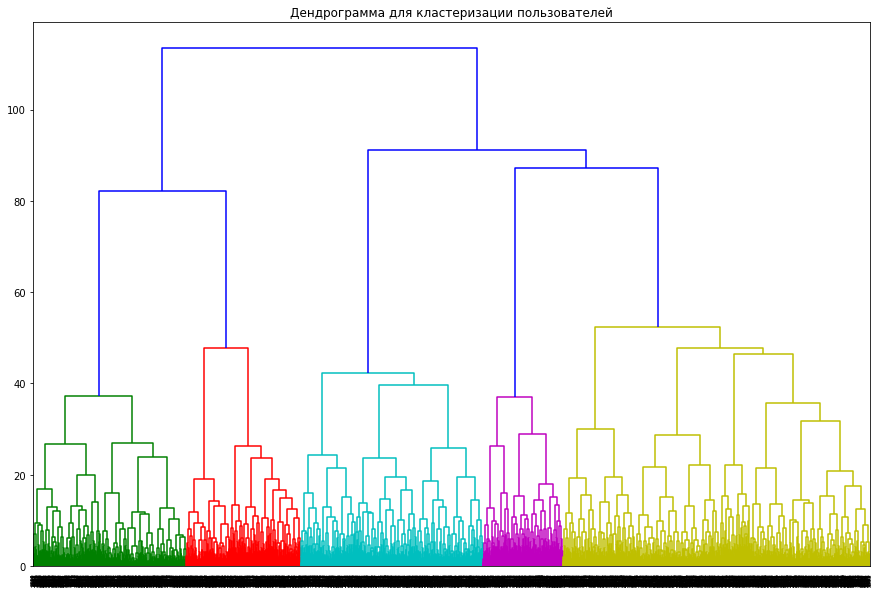

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма для кластеризации пользователей')
plt.show() 

### Алгоритм K-Means <a id="step5.2"></a>   
</div>  

У нас 5 разных цветов, поэтому число кластеров для `KMeans` берём равное 5 (что совпадает с условием проекта)

In [26]:
km = KMeans(n_clusters = 5)

Прогнозируем кластеры для наблюдений

In [27]:
labels = km.fit_predict(x_sc)

Cохраняем метки кластера в поле нашего датасета

In [28]:
data['cluster_churn'] = labels

### Средние значения признаков для кластеров <a id="step5.3"></a>   
</div>  

Сгруппируем данные по `cluster_churn`. Округлим данные до двух знаков после запятой и перевернём таблицу для удобства воспрития

In [29]:
display(data.groupby('cluster_churn').mean().round(2).T)

cluster_churn,0,1,2,3,4
gender,0.53,0.47,0.55,0.50,0.51
near_location,0.87,0.83,0.84,0.94,0.76
partner,0.47,0.45,0.38,0.77,0.34
promo_friends,0.31,0.25,0.21,0.56,0.18
phone,0.00,1.00,1.00,1.00,1.00
contract_period,4.82,2.65,2.74,11.17,1.57
group_visits,0.43,0.38,0.44,0.56,0.26
age,29.34,30.02,29.98,29.90,26.91
avg_additional_charges_total,144.52,153.79,159.98,161.46,114.99
month_to_end_contract,4.50,2.46,2.52,10.22,1.51


Дополнительно посмотрим сколько корней в каждом кластере 

In [30]:
data['cluster_churn'].value_counts()

3    968
4    941
1    862
2    847
0    382
Name: cluster_churn, dtype: int64

- Для **кластера №1** характерно высокое влияние мультиколлинеарных `month_end_contract` и `contract_period`;
- Возраст, пол у кластеров одинаковый;
- **Кластер №2** удалён от фитнес-центров;
- **Кластер №0** не оставляет телефон;
- **Кластеры** не равнозначны как по количеству клиентов (преимущество у кластера №3), так и по доле оттока. Хуже всего показывают себя **кластер №4**. Лучше всех ***кластеры №3 и №1***. 


### Графики распределения признаков для кластеров <a id="step5.4"></a>   
</div>  

Для подтверждения наших наблюдений построим графики для каждого признака и изучим отток

Аналогично нашему подходу выше, для бинарных данных проведем подсчет количества значений

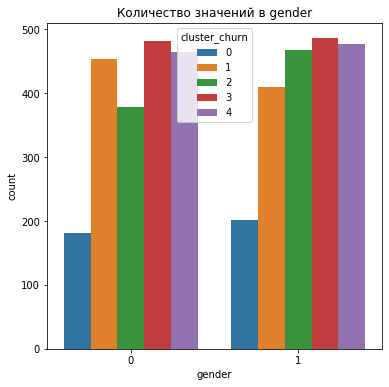

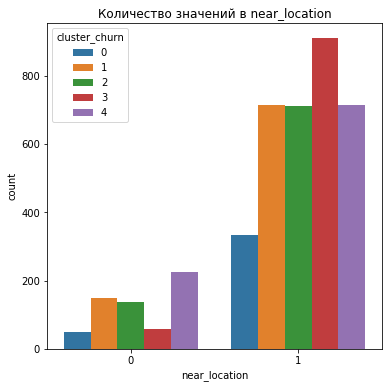

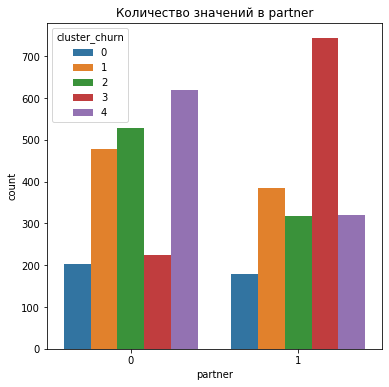

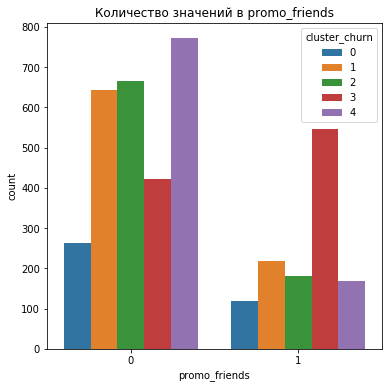

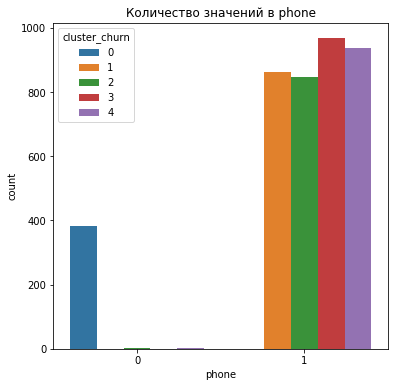

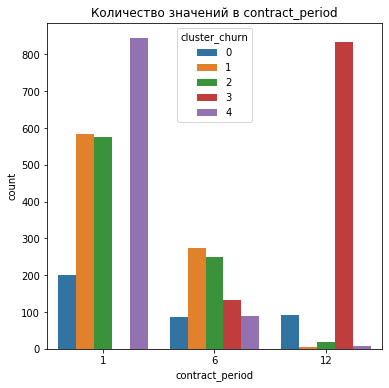

In [31]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone',  'contract_period']:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=data, x = data[column], hue='cluster_churn')
    plt.title('Количество значений в ' + column)
    plt.show()

И продолжая логику, для остальных значений построим "ящики с усами"

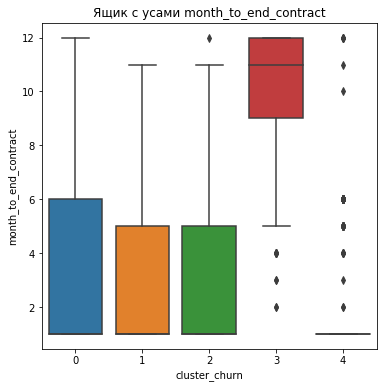

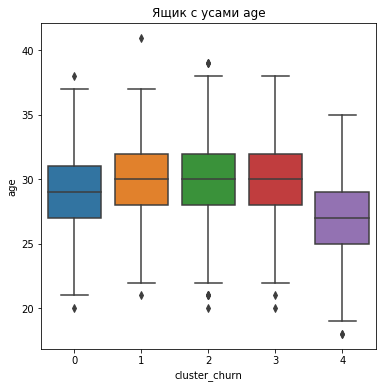

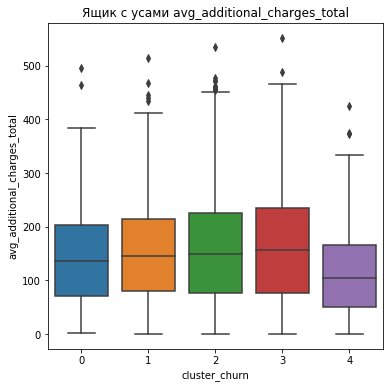

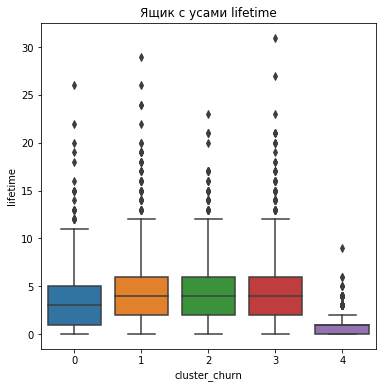

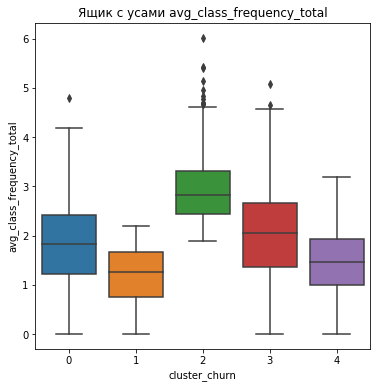

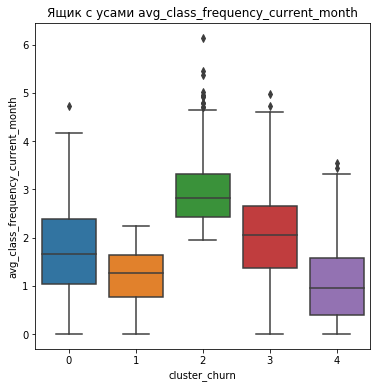

In [32]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(6, 6))
    sns.boxplot(data = data, x = 'cluster_churn', y = data[column])
    plt.title('Ящик с усами' + ' ' + column)
    plt.show()

Вполне ожидаемо никаких противоречий с нашими выводами к таблице

### Шаг 6. Общий вывод <a id="step6"></a>   
</div>  

В процессе работы над проектом мы не обнаружили интересных инсайтов, но можем дать понятные рекомендации по целевой аудитории в будущем.

- Наш датасет не имел особенных проблем;
- Мы предобработали данные и провели исследовательский анализ данных (EDA);
- Построили матрицу корреляции и нашли мультиколлинеарные признаки;
- Также нашли признаки `phone` и `gender`, который не влияют на нашу целевую переменную. Не оставили телефон? Переживём! А пол в современном мире не важен;
- Пришли к выводу, что логистическая регрессия нам больше подходит, чем случайный лес (хотя и разница не слишком большая);
- Разбили всех на кластеры (их получилось 5);
  

#### Отдельно мы можем сформулировать принципы для дальнейших маркетинговых действий

1. Стараться привлекать клиентов в групповые занятия, это втягивает их в "коллектив". Появлются новые знакомства, новые коммуникации, а значит и мотивации ходить добавляется;
2. Продолжать развивать корпоративные платформы, чем больше связей - тем лучше;
3. Описывать ЦА для маркетинга с характерными (look-alike) чертами кластеров №1 и №3 (групповые занятия, затраты). Возможно, стоит рассмотреть перспективу повышения ценнового сегмента ЦА. 
4. Не ориентироваться на возраст, здесь правды нет.